In [ ]:
#!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

In [ ]:
!pip install sweetviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 31.7 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import sweetviz as sv
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV, KFold, train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [ ]:
df = pd.read_csv('/content/Occupancy_Estimation.csv')
df

,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
0,2017/12/22,10:49:41,24.94,24.75,24.56,25.38,121,34,53,40,0.08,0.19,0.06,0.06,390,0.769231,0,0,1
1,2017/12/22,10:50:12,24.94,24.75,24.56,25.44,121,33,53,40,0.93,0.05,0.06,0.06,390,0.646154,0,0,1
2,2017/12/22,10:50:42,25.00,24.75,24.50,25.44,121,34,53,40,0.43,0.11,0.08,0.06,390,0.519231,0,0,1
3,2017/12/22,10:51:13,25.00,24.75,24.56,25.44,121,34,53,40,0.41,0.10,0.10,0.09,390,0.388462,0,0,1
4,2017/12/22,10:51:44,25.00,24.75,24.56,25.44,121,34,54,40,0.18,0.06,0.06,0.06,390,0.253846,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10124,2018/01/11,08:58:07,25.06,25.13,24.69,25.31,6,7,33,22,0.09,0.04,0.06,0.08,345,0.000000,0,0,0
10125,2018/01/11,08:58:37,25.06,25.06,24.69,25.25,6,7,34,22,0.07,0.05,0.05,0.08,345,0.000000,0,0,0
10126,2018/01/11,08:59:08,25.13,25.06,24.69,25.25,6,7,34,22,0.11,0.05,0.06,0.08,345,0.000000,0,0,0
10127,2018/01/11,08:59:39,25.13,25.06,24.69,25.25,6,7,34,22,0.08,0.08,0.10,0.08,345,0.000000,0,0,0


# **EDA FOR MY DATAFRAME**

In [ ]:
report = sv.analyze(df)

                                             |          | [  0%]   00:00 -> (? left)


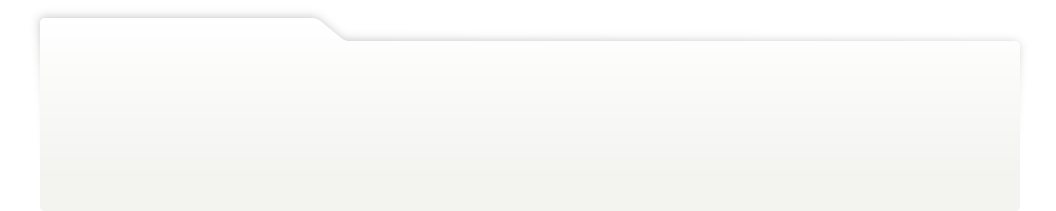
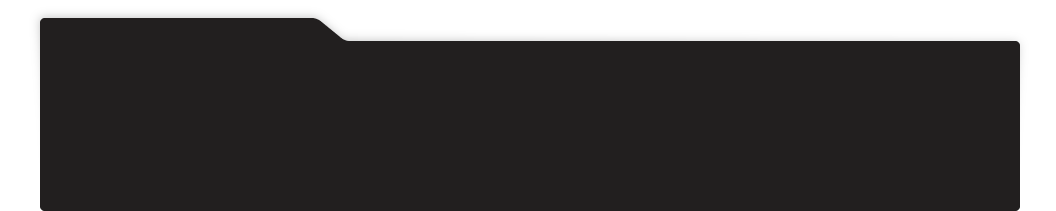
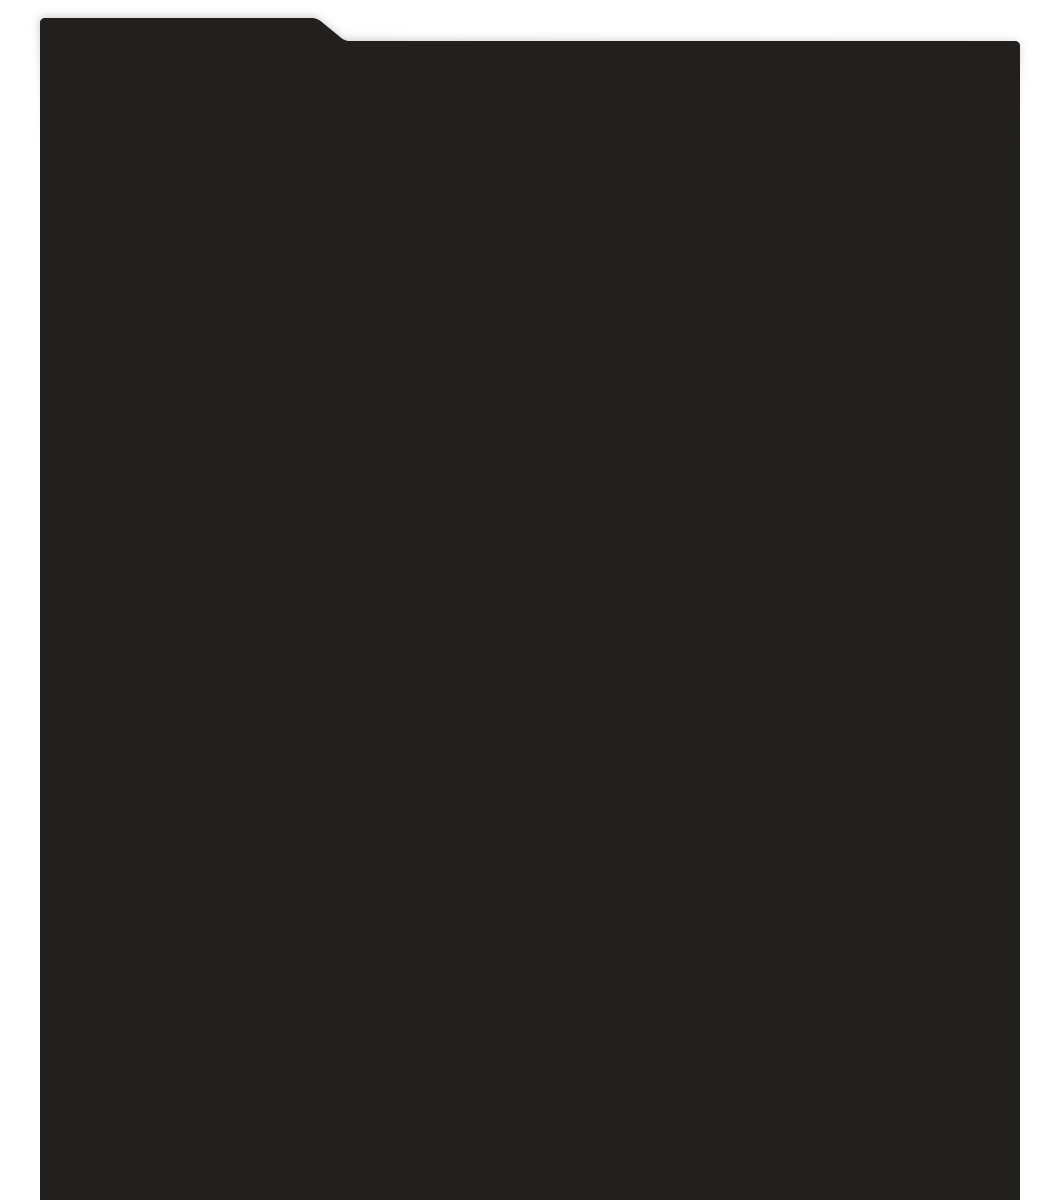
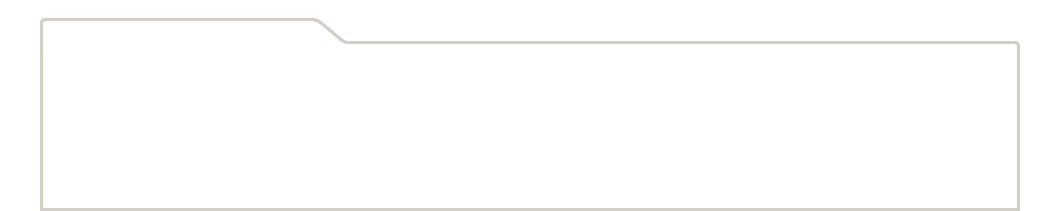
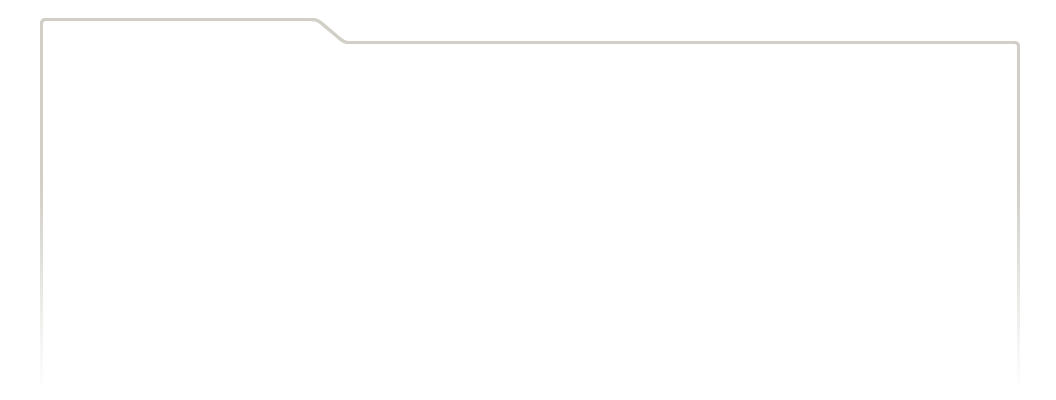
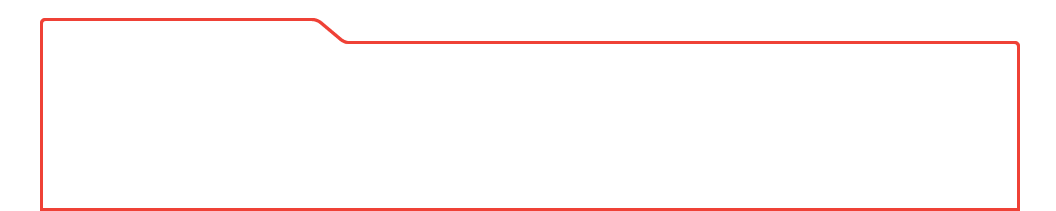
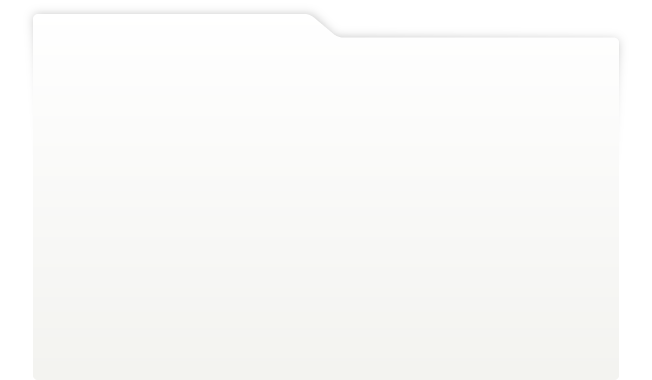
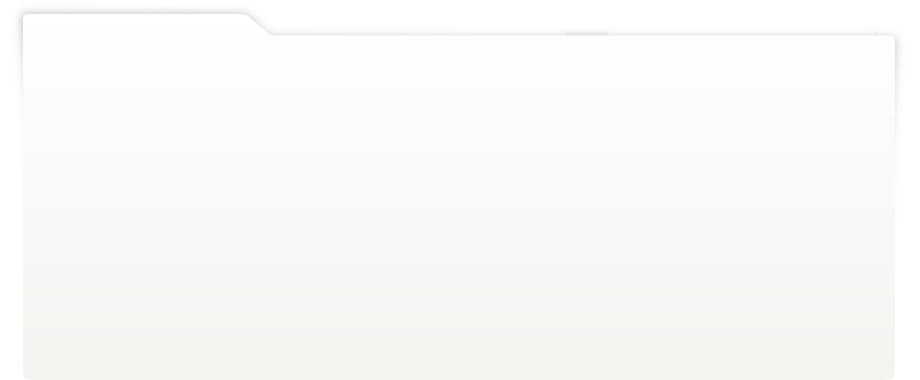
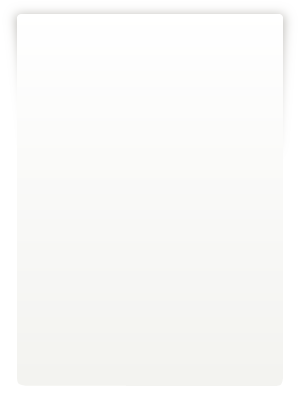
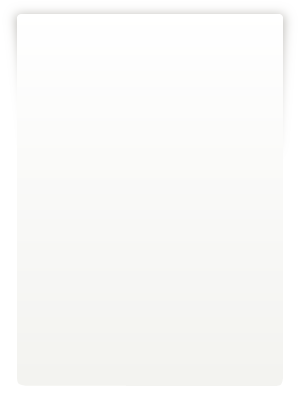
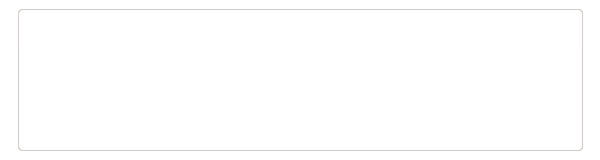
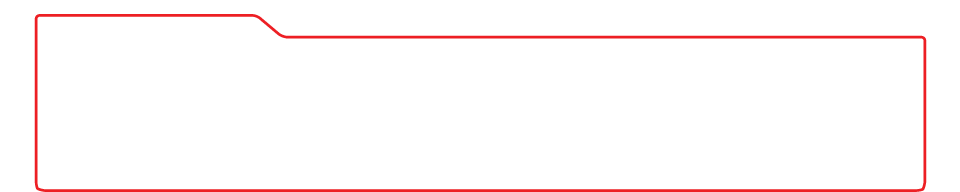
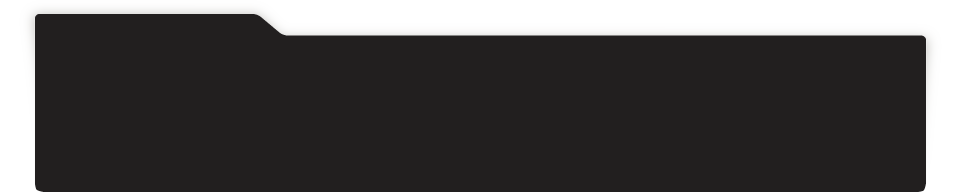
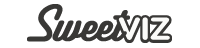
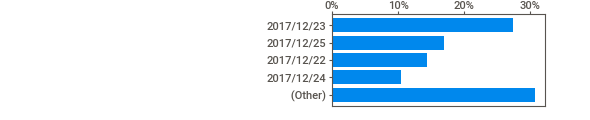
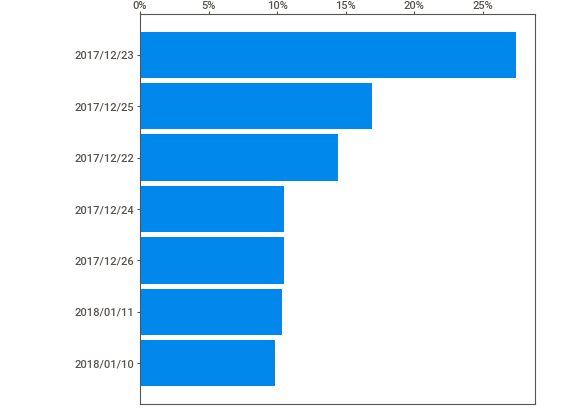
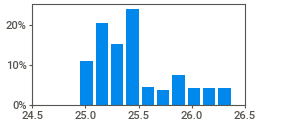
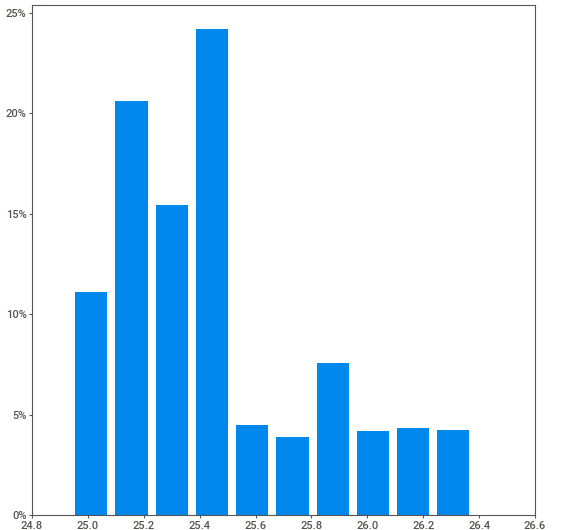
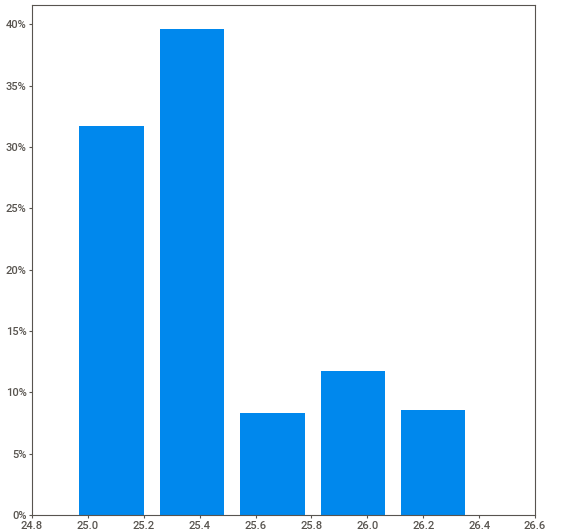
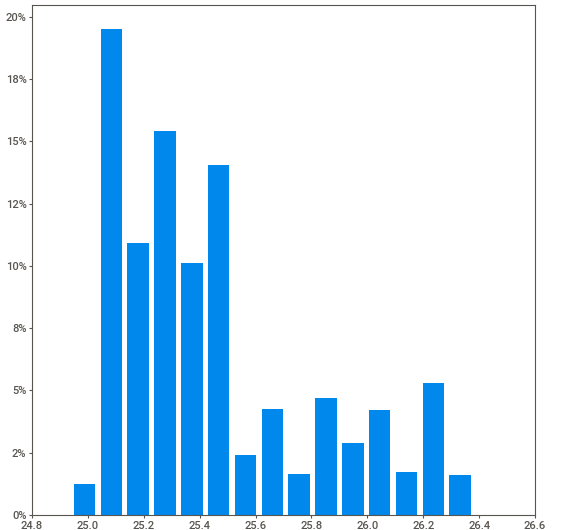
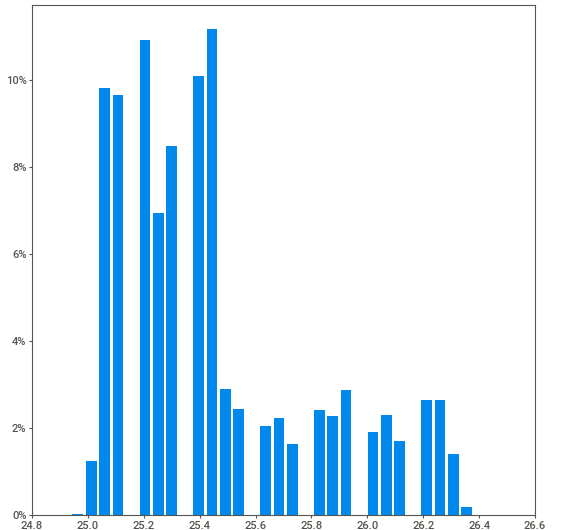
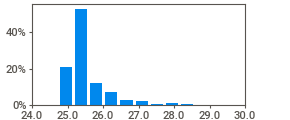
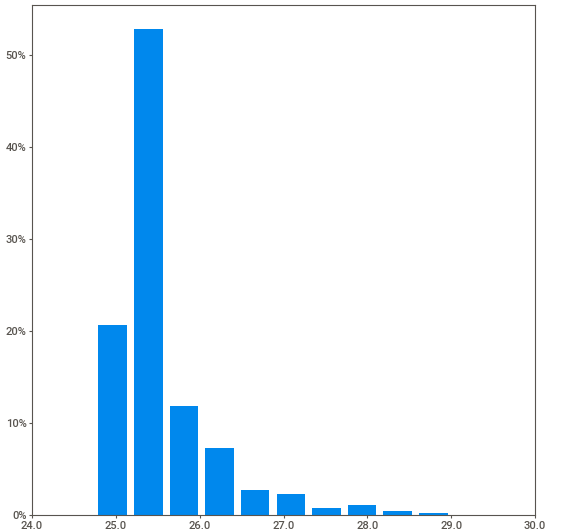
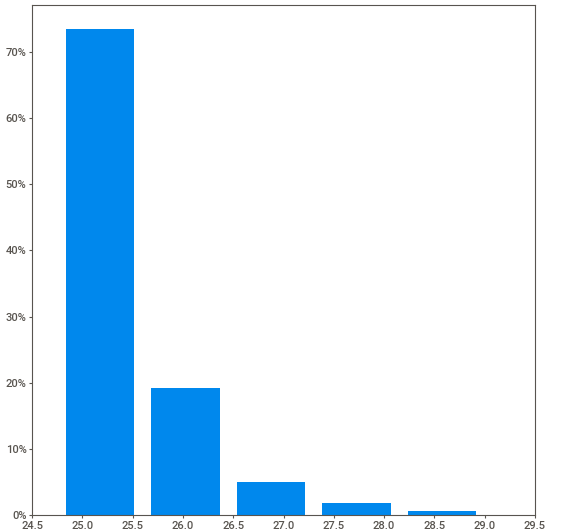
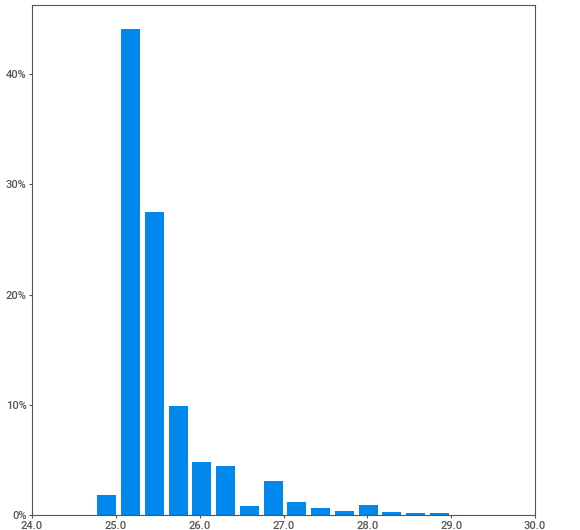
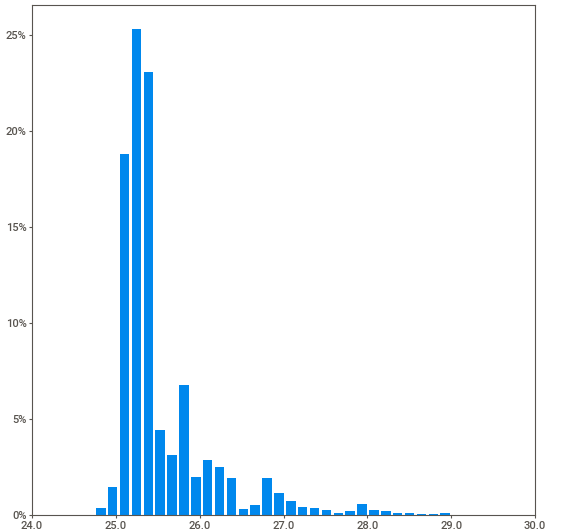
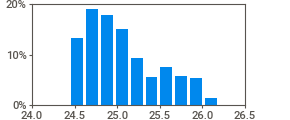
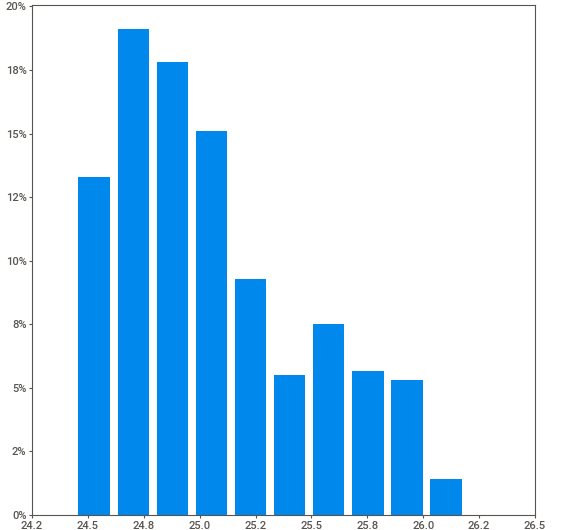
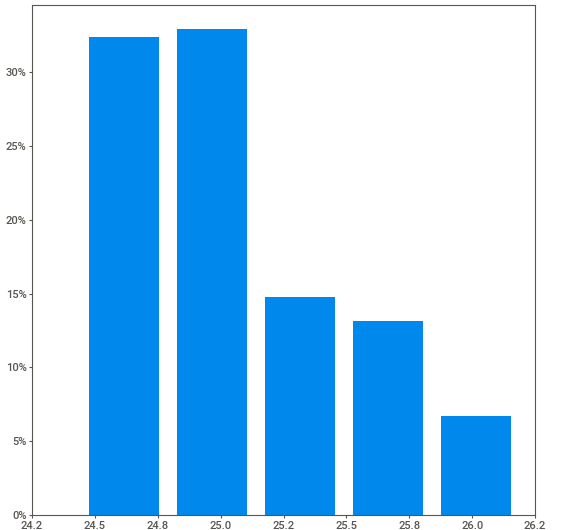
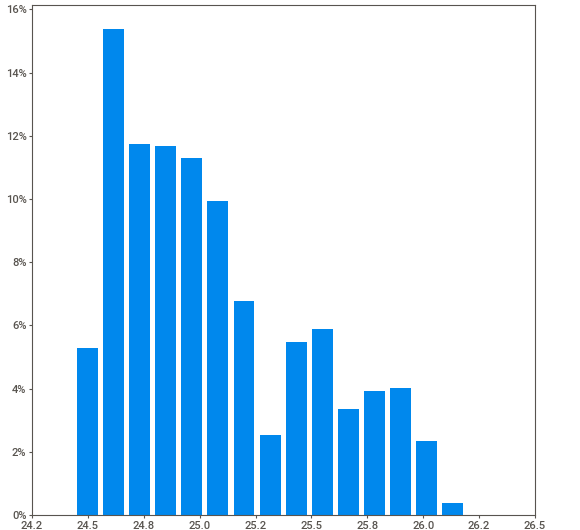
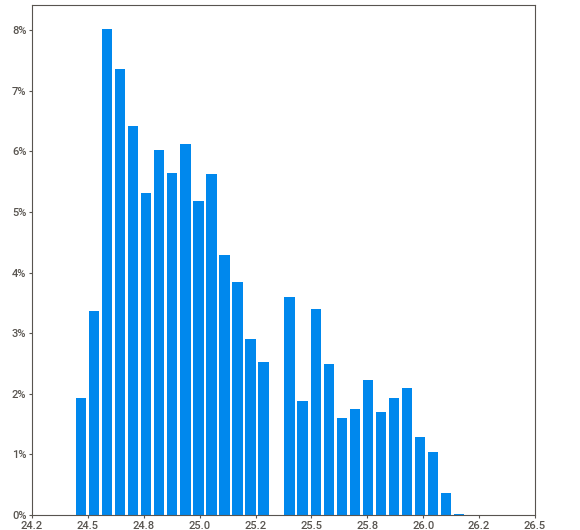
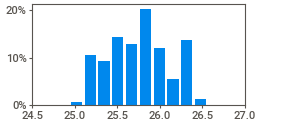
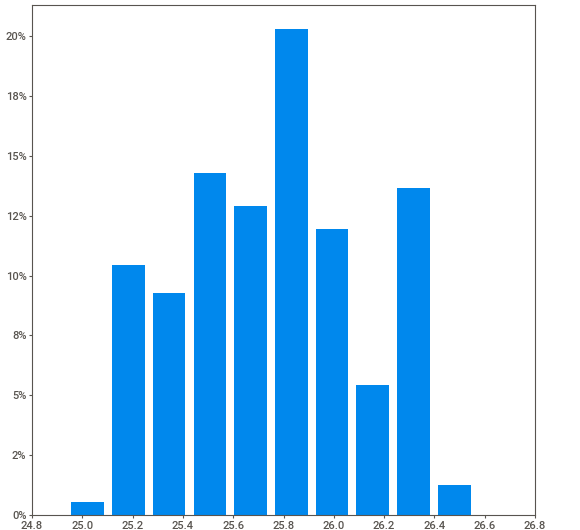
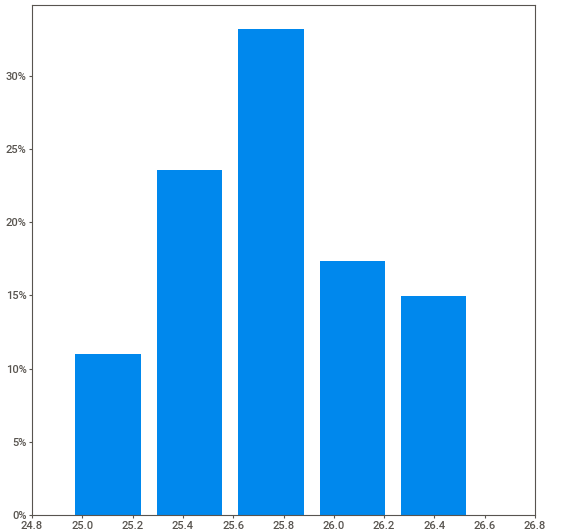
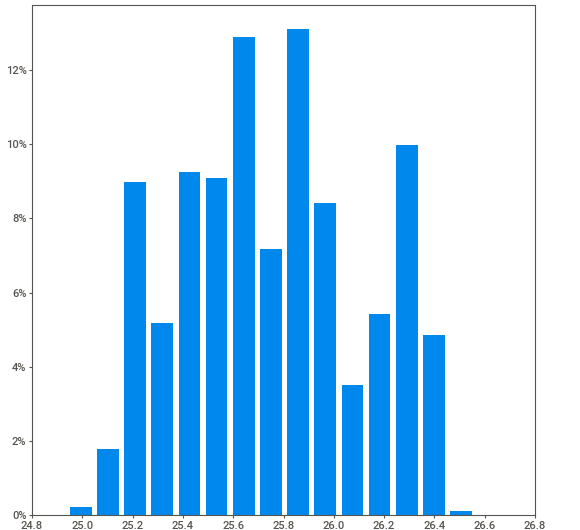
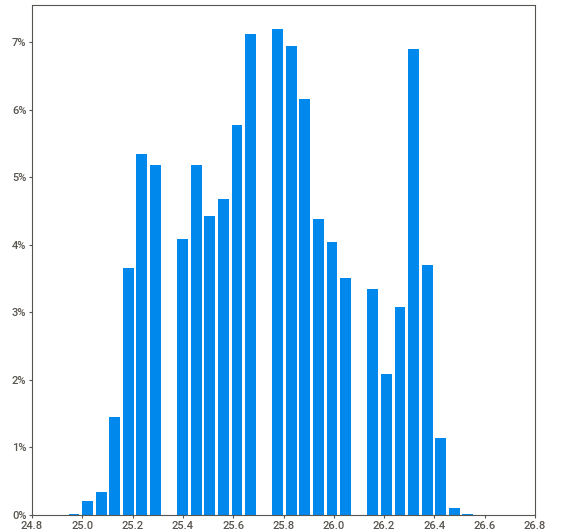
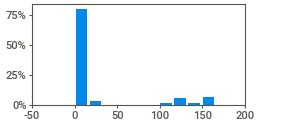
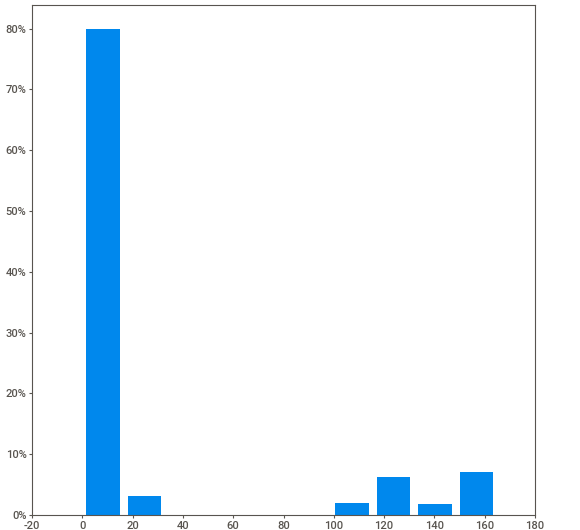
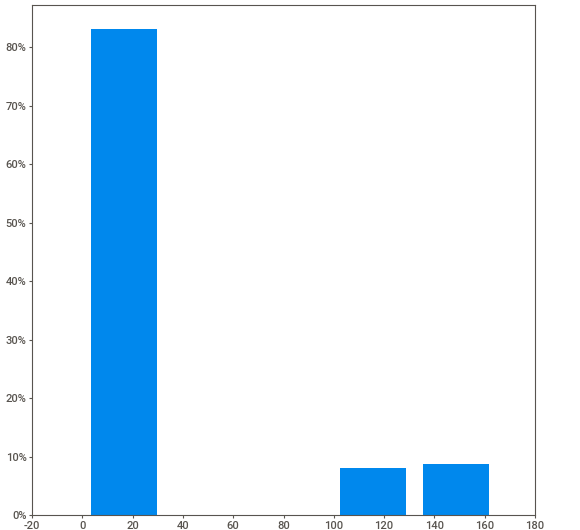
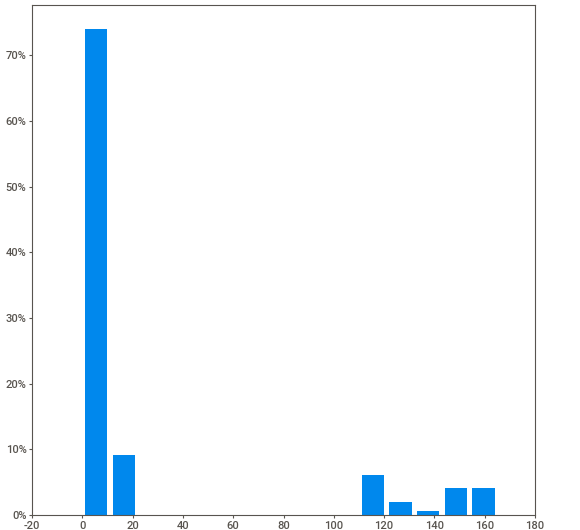
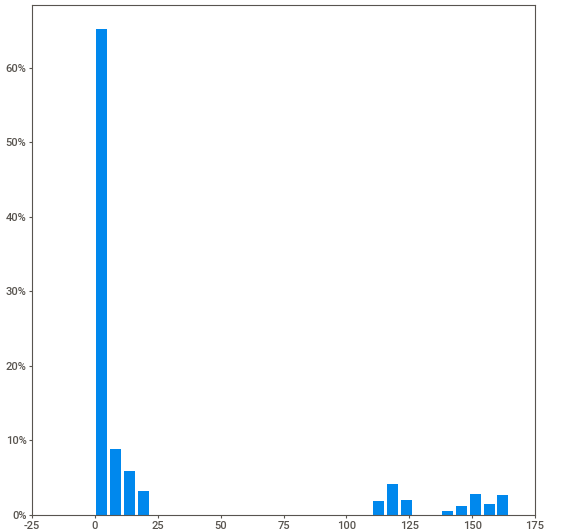
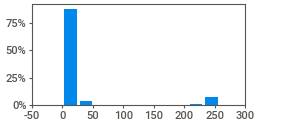
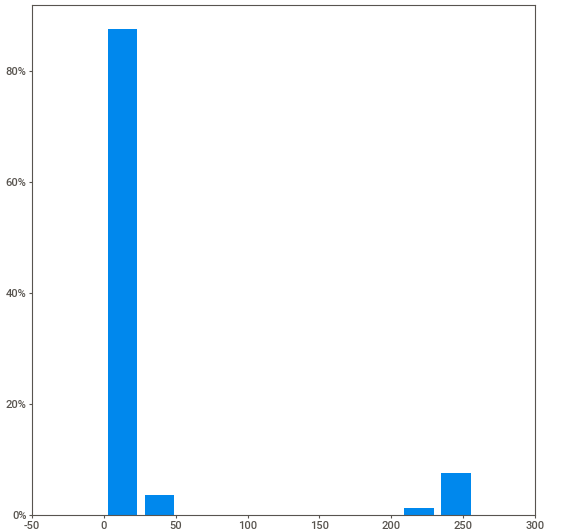
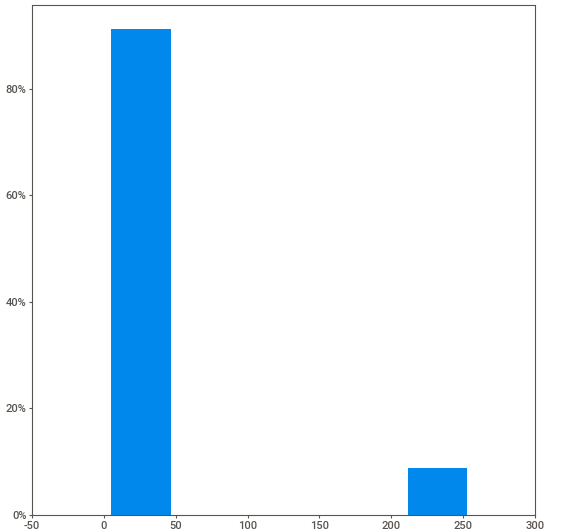
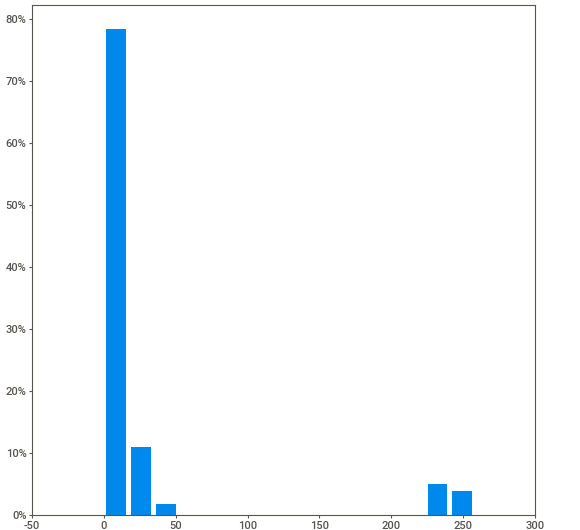
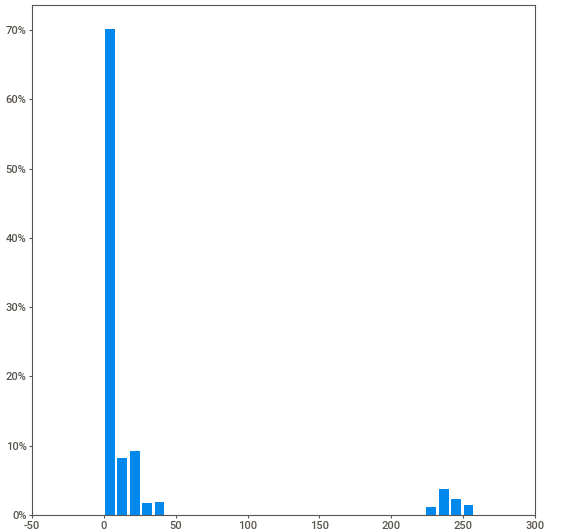
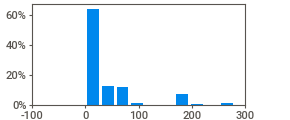
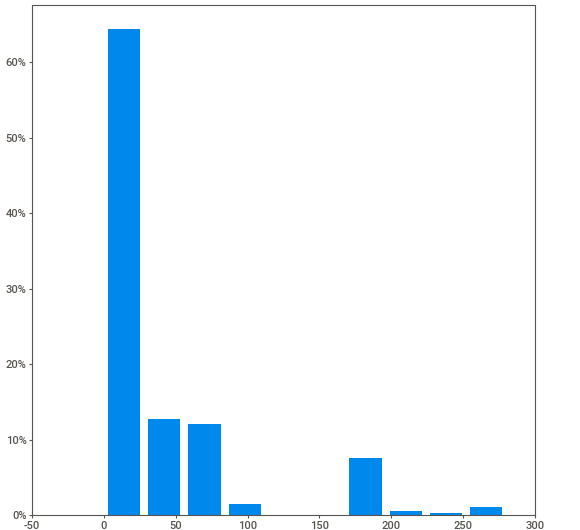
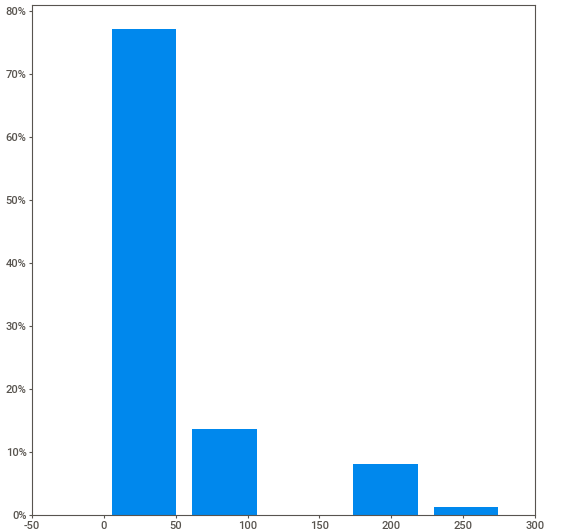
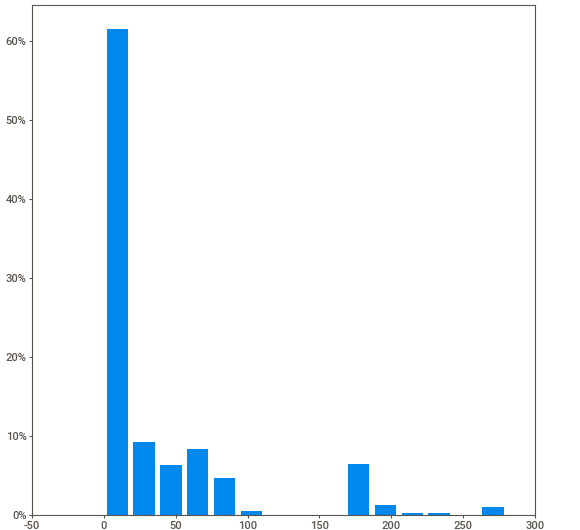
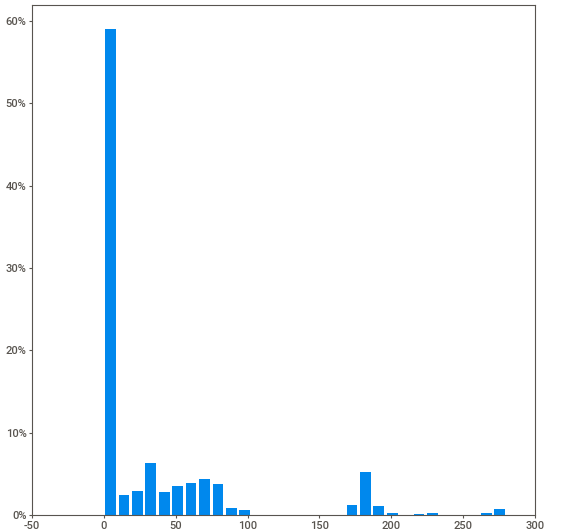
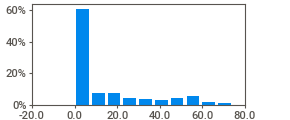
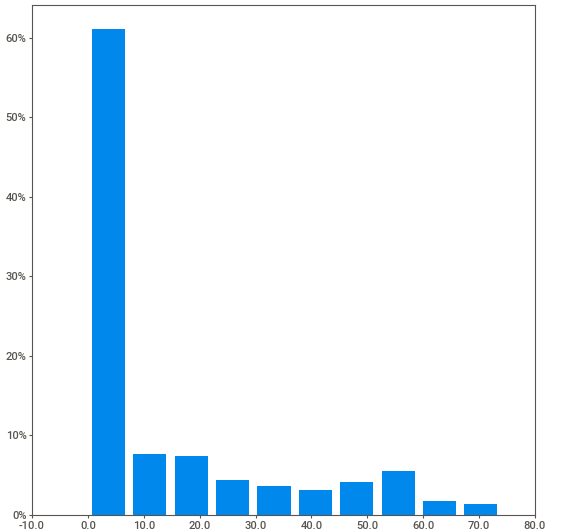
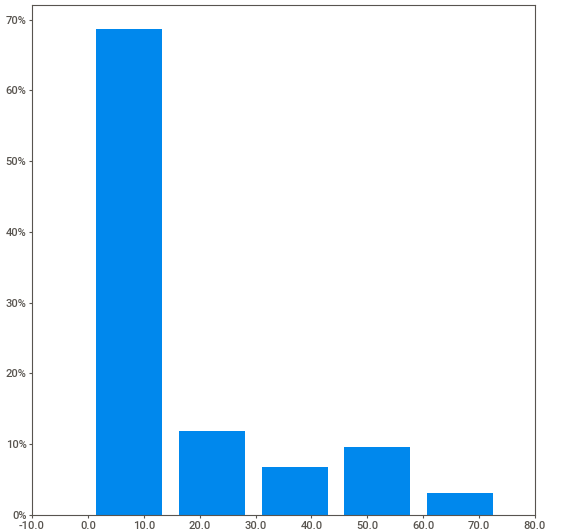
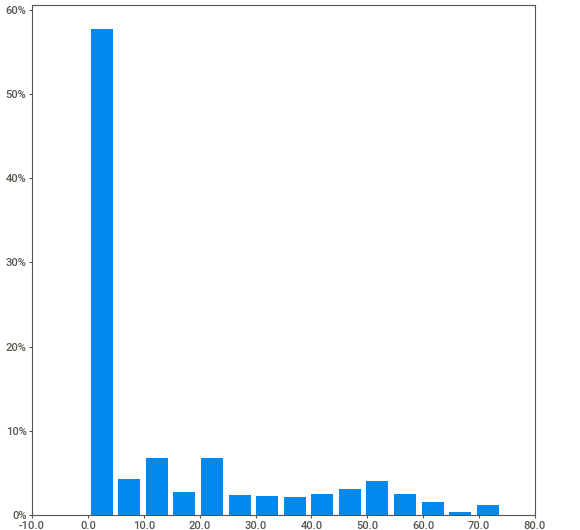
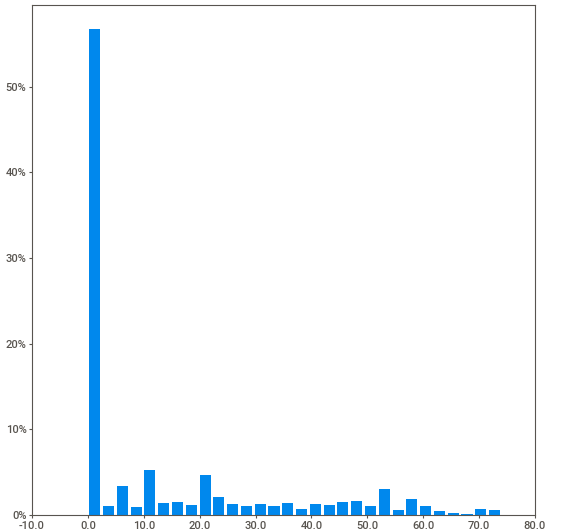
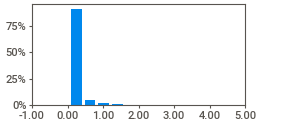
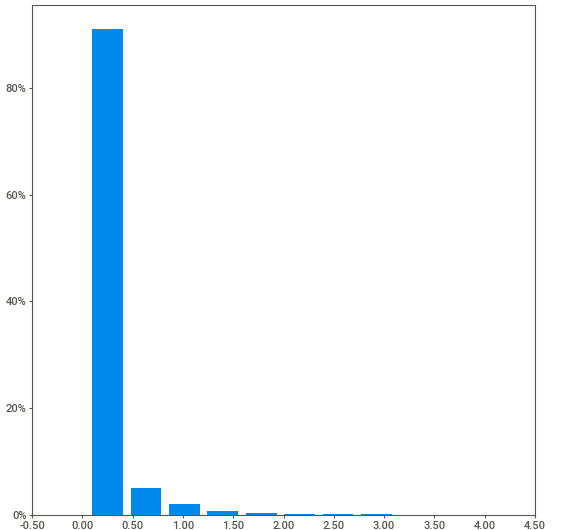
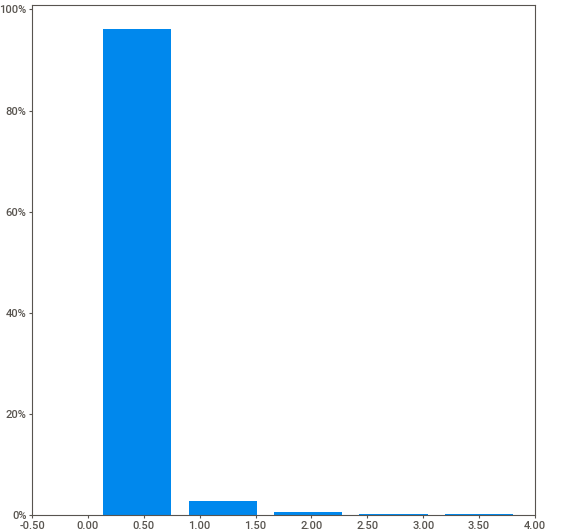
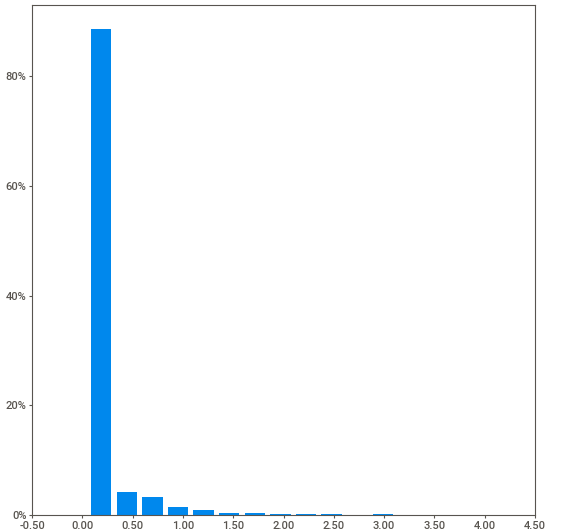
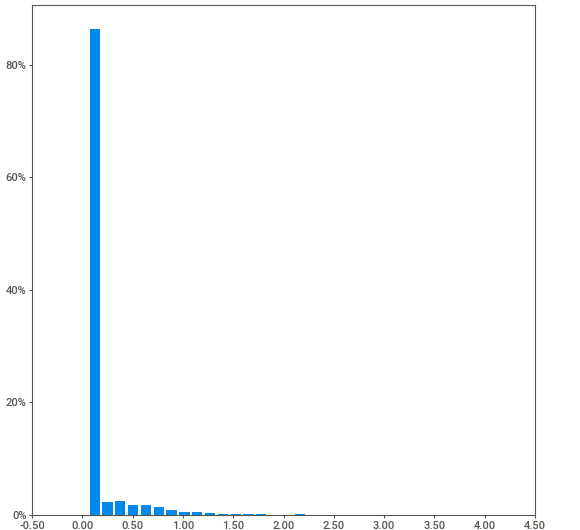
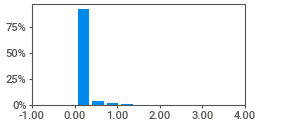
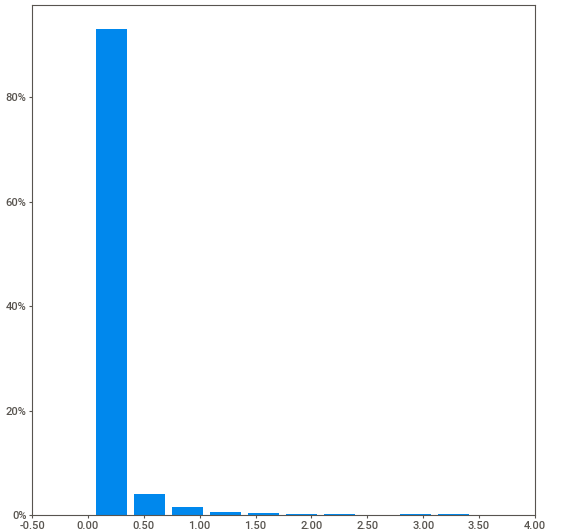
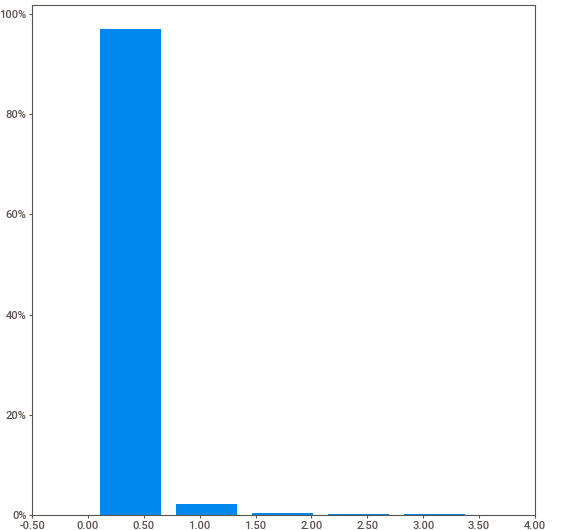
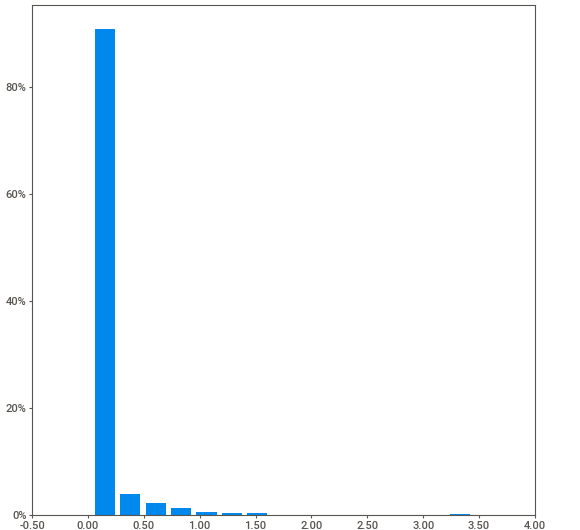
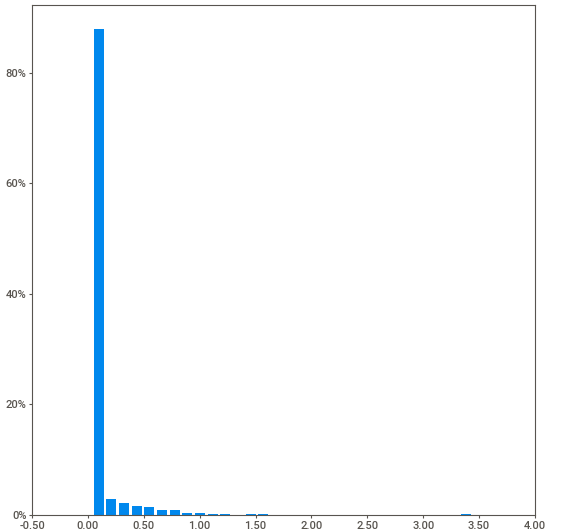
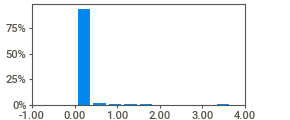
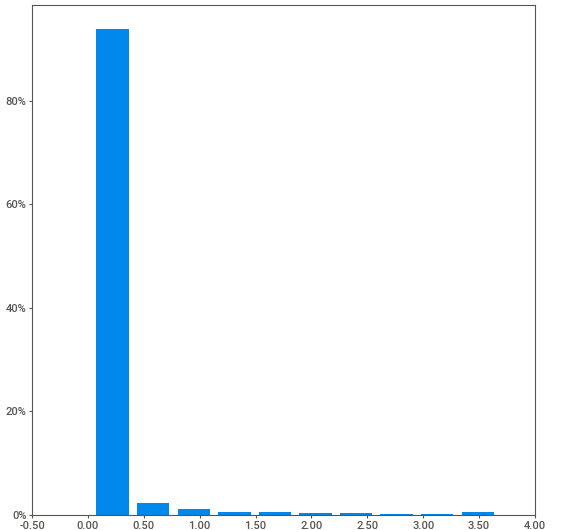
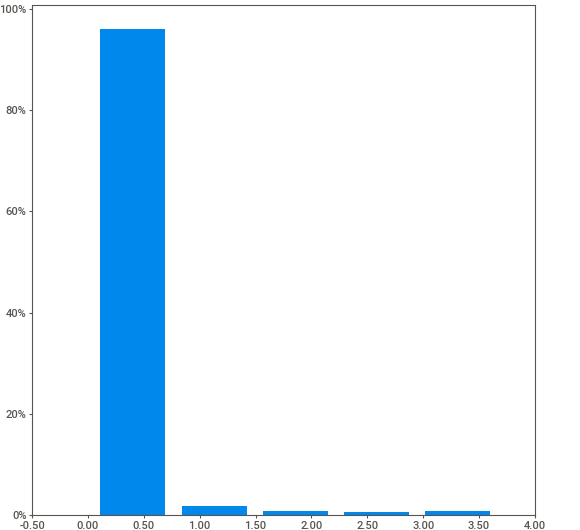
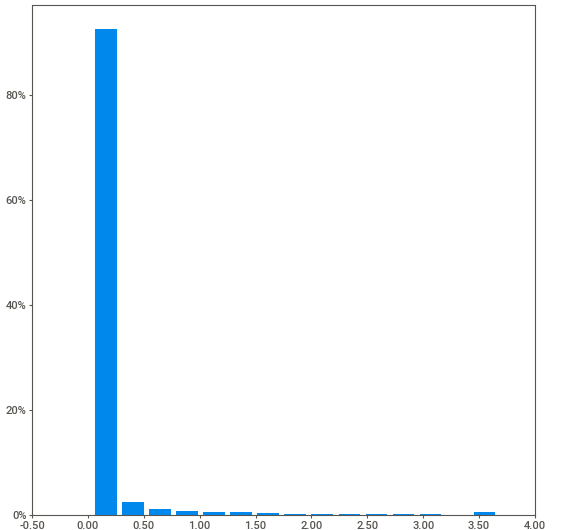
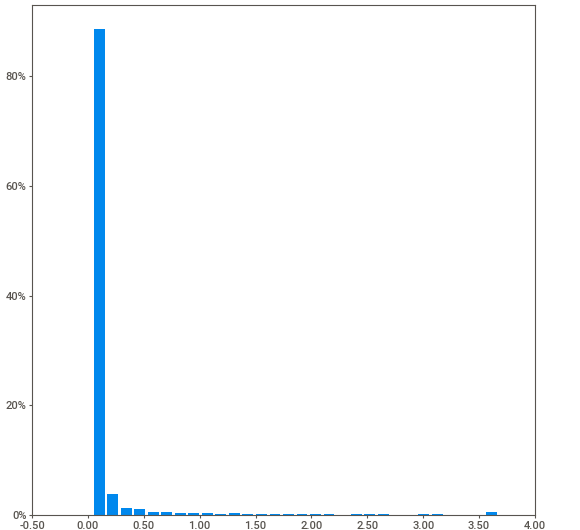
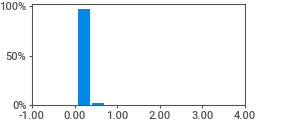
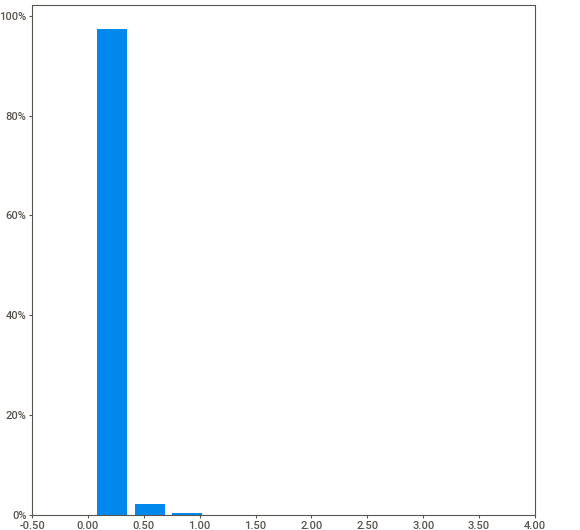
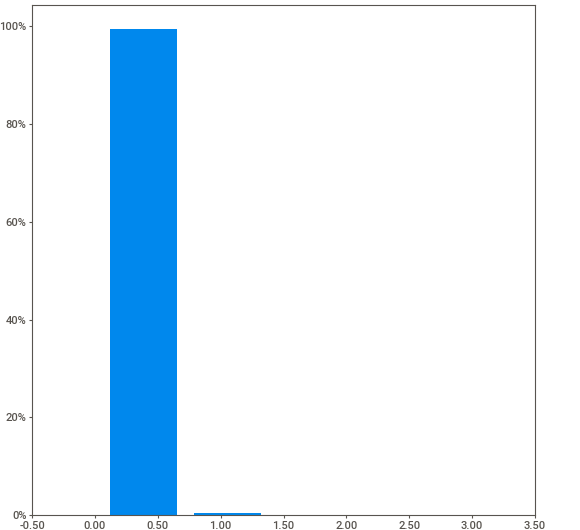
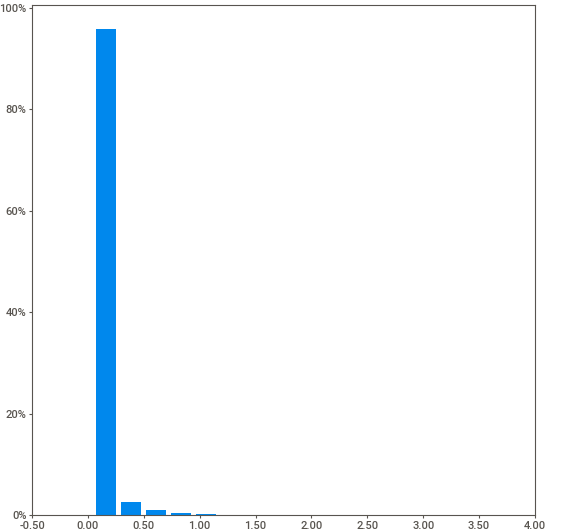
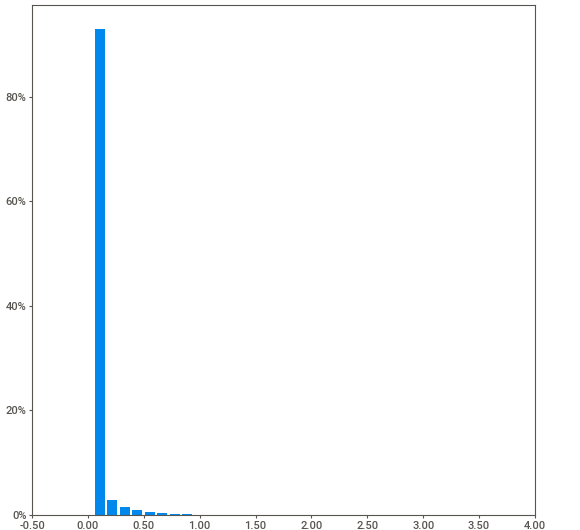
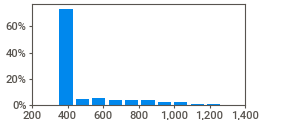
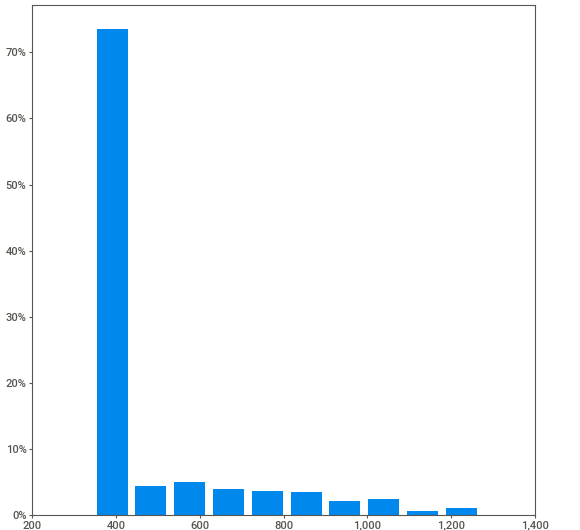
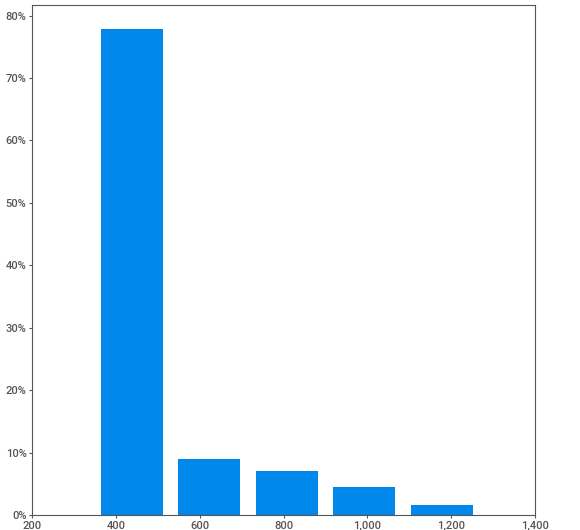
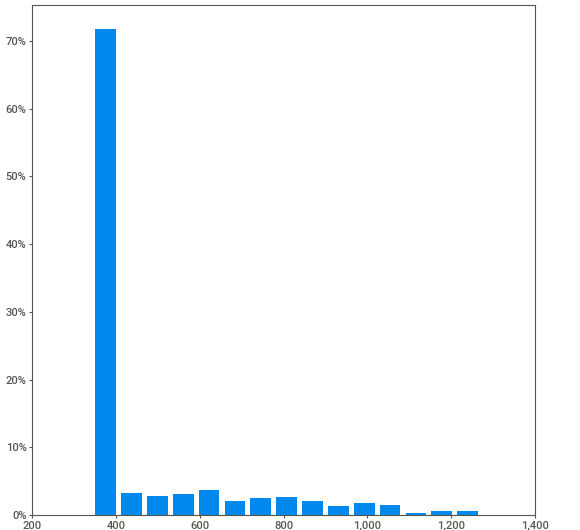
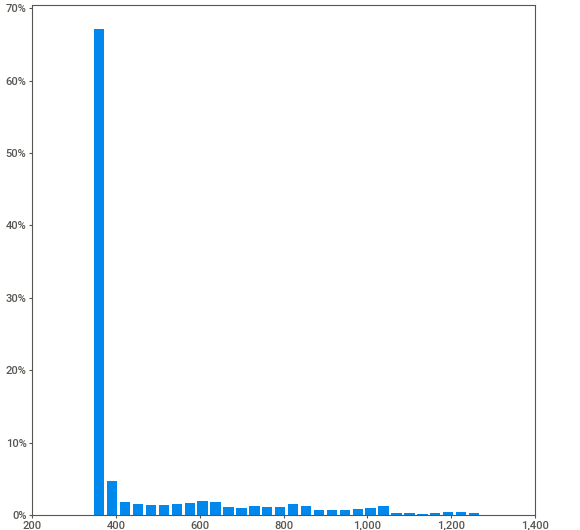
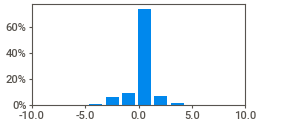
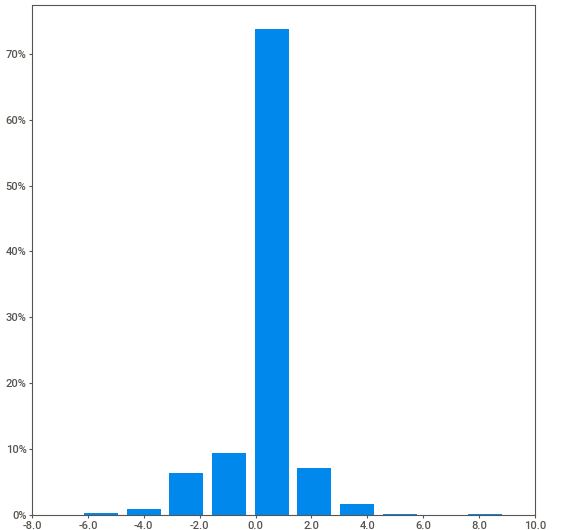
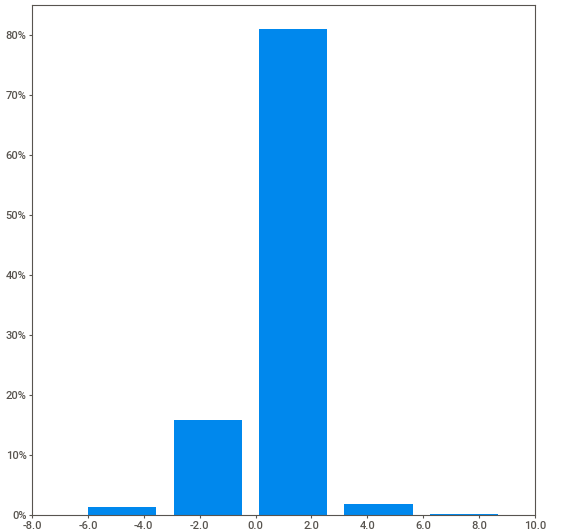
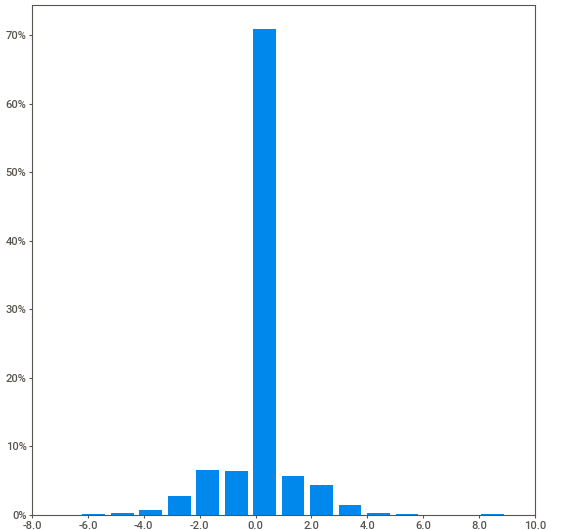
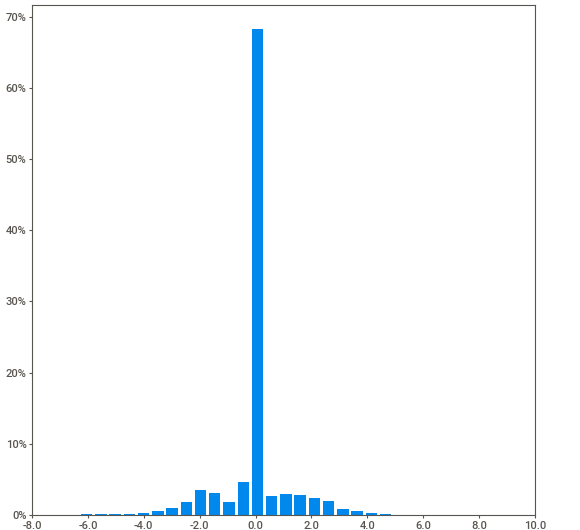
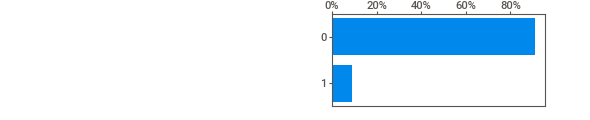
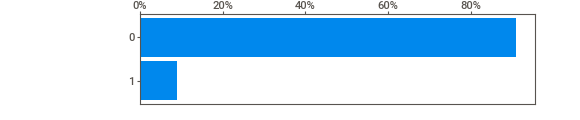
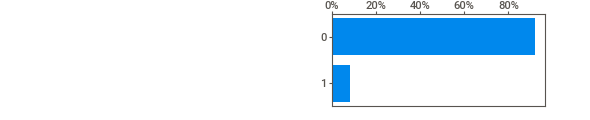
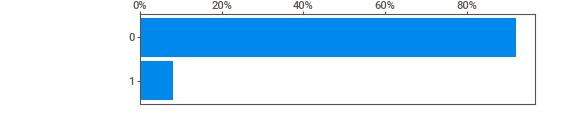
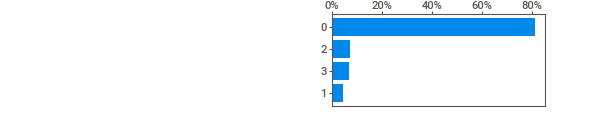
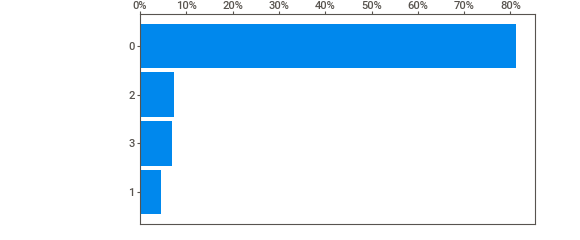
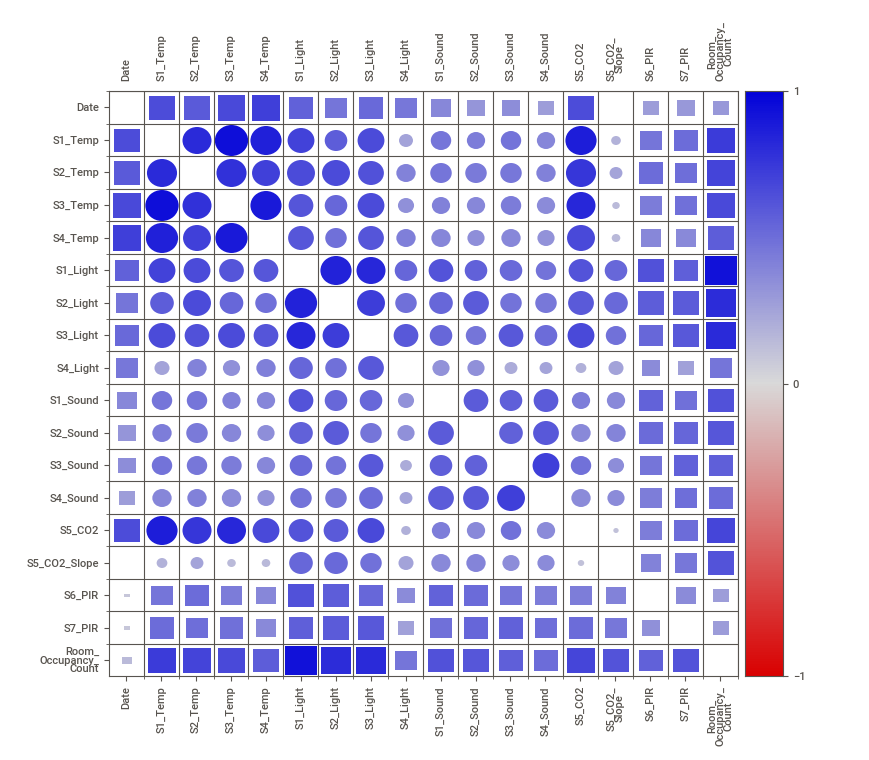
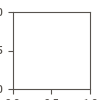

In [ ]:
report.show_notebook()

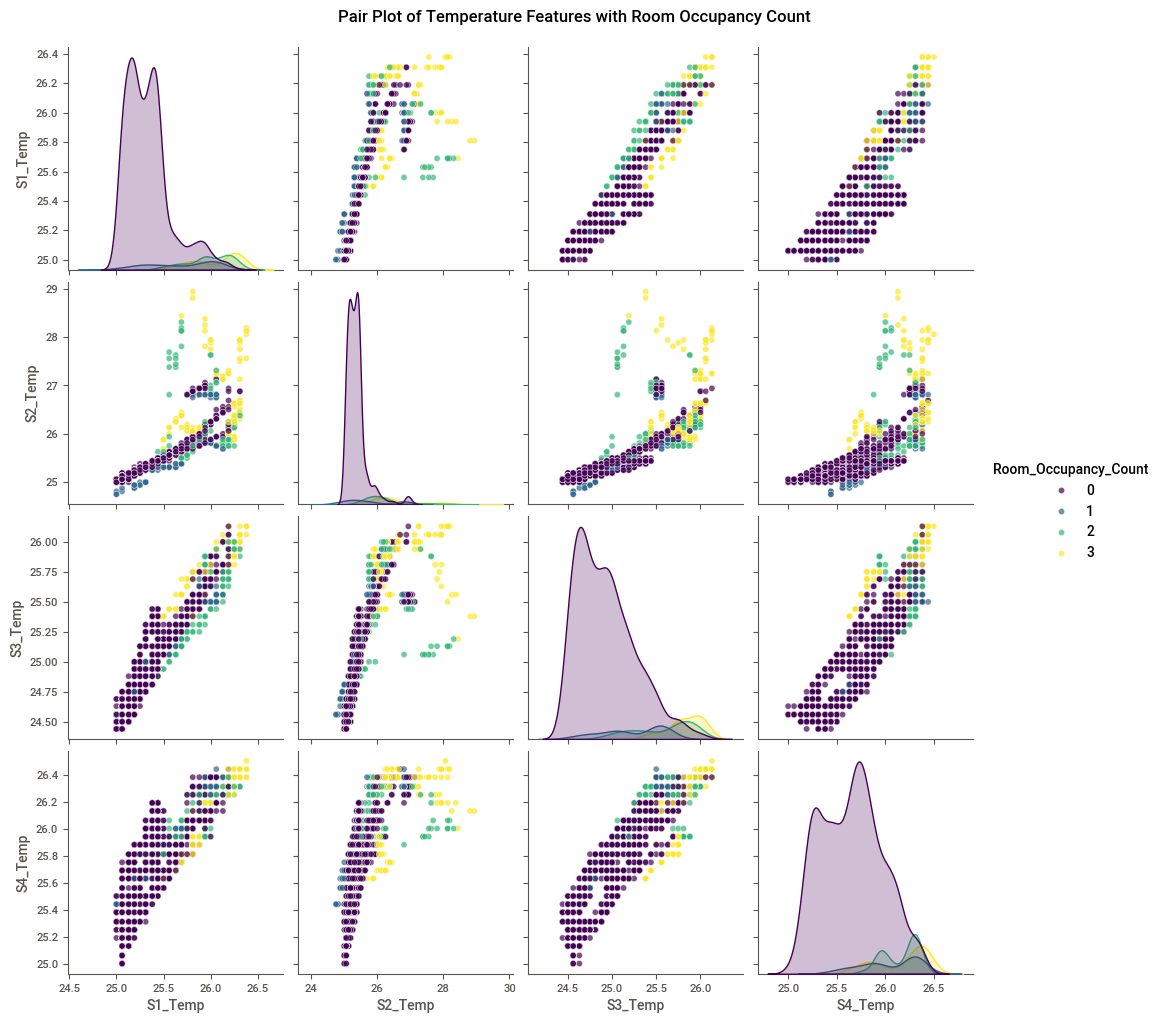

In [ ]:
# Assuming your DataFrame is named df
temperature_cols = ['S1_Temp', 'S2_Temp', 'S3_Temp', 'S4_Temp', 'Room_Occupancy_Count']
temperature_df = df[temperature_cols]

# Plot pair plot with adjustments
sns.pairplot(temperature_df.sample(frac=0.2), hue='Room_Occupancy_Count', palette='viridis', plot_kws={'alpha': 0.7, 's': 20})
plt.suptitle('Pair Plot of Temperature Features with Room Occupancy Count', y=1.02)
plt.show()


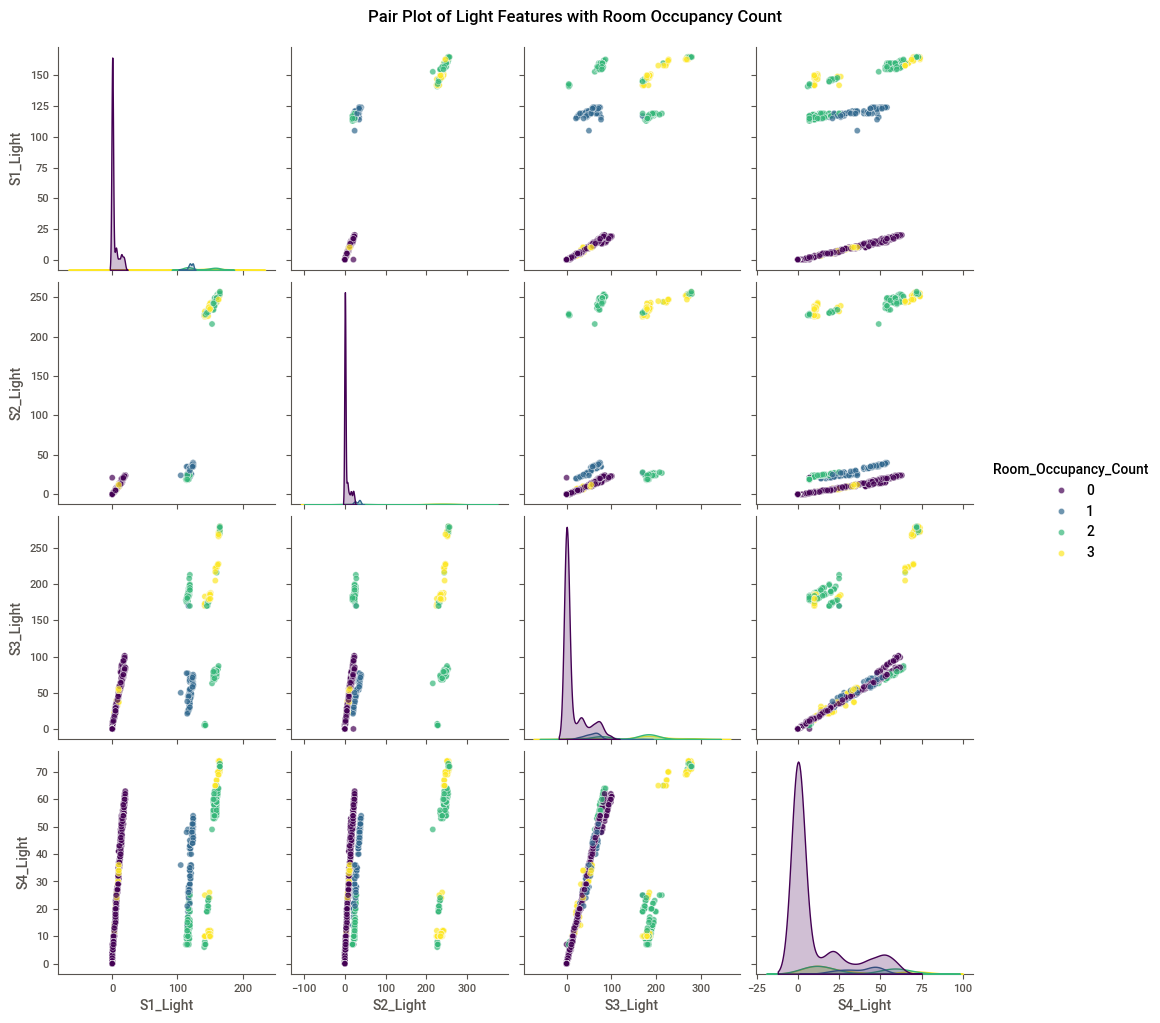

In [ ]:
# Assuming your DataFrame is named df
light_cols = ['S1_Light','S2_Light', 'S3_Light', 'S4_Light' ,'Room_Occupancy_Count']
light_df = df[light_cols]

# Plot pair plot with adjustments
sns.pairplot(light_df.sample(frac=0.2), hue='Room_Occupancy_Count', palette='viridis', plot_kws={'alpha': 0.7, 's': 20})
plt.suptitle('Pair Plot of Light Features with Room Occupancy Count', y=1.02)
plt.show()


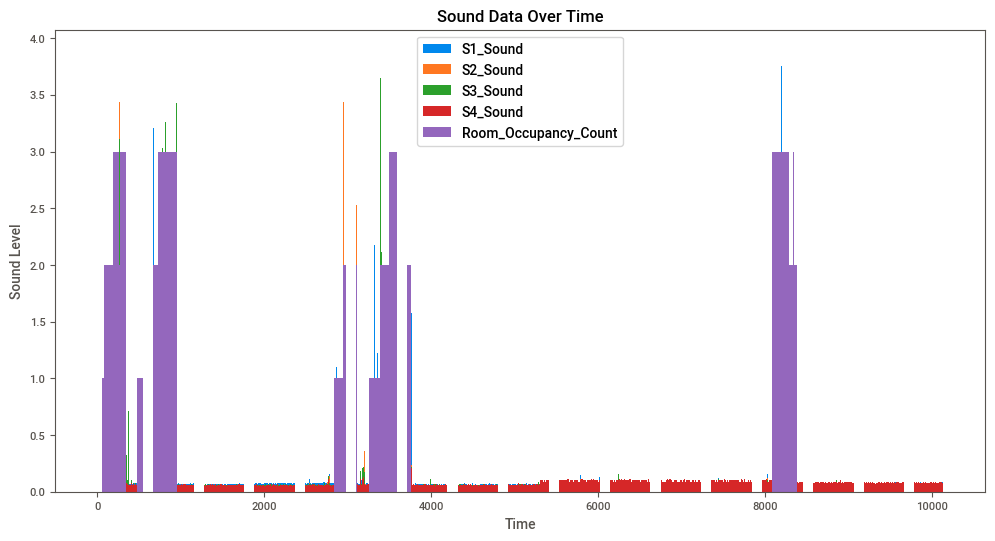

In [ ]:
# Assuming your DataFrame is named df
sound_cols = ['S1_Sound', 'S2_Sound', 'S3_Sound', 'S4_Sound', 'Room_Occupancy_Count']
sound_df = df[sound_cols]


plt.figure(figsize=(12, 6))

for column in sound_df.columns:
    plt.bar(sound_df.index, sound_df[column], label=column)

plt.title('Sound Data Over Time')
plt.xlabel('Time')
plt.ylabel('Sound Level')
plt.legend()
plt.show()

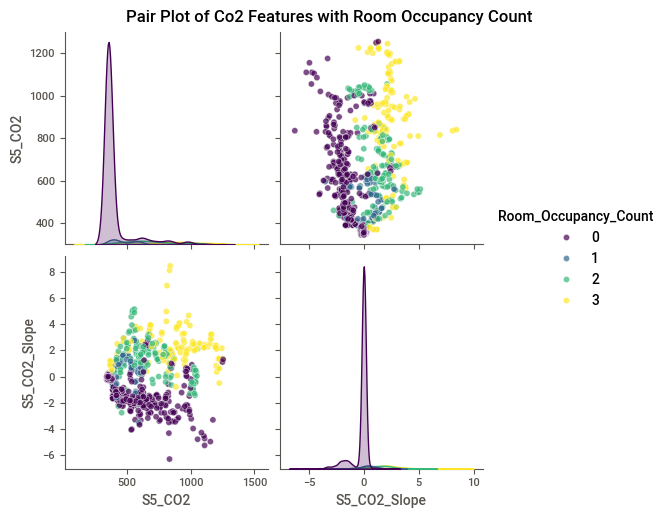

In [ ]:
# Assuming your DataFrame is named df
Co2_cols = ['S5_CO2', 'S5_CO2_Slope','Room_Occupancy_Count']
Co2_df = df[Co2_cols]

# Plot pair plot with adjustments
sns.pairplot(Co2_df.sample(frac=0.2), hue='Room_Occupancy_Count', palette='viridis', plot_kws={'alpha': 0.7, 's': 20})
plt.suptitle('Pair Plot of Co2 Features with Room Occupancy Count', y=1.02)
plt.show()


<ipython-input-11-236407252d59>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Room_Occupancy_Count",data=df, palette=color)
<ipython-input-11-236407252d59>:3: UserWarning: 
The palette list has fewer values (1) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x="Room_Occupancy_Count",data=df, palette=color)


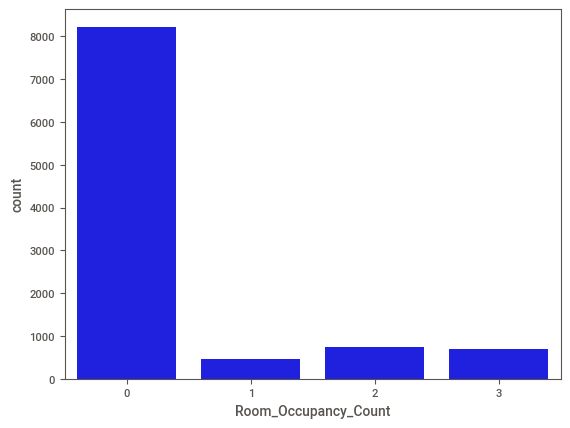

In [ ]:
# Imballance Traget
color =['Blue']
sns.countplot(x="Room_Occupancy_Count",data=df, palette=color)
sns.set(rc={'figure.figsize':(5,5)})

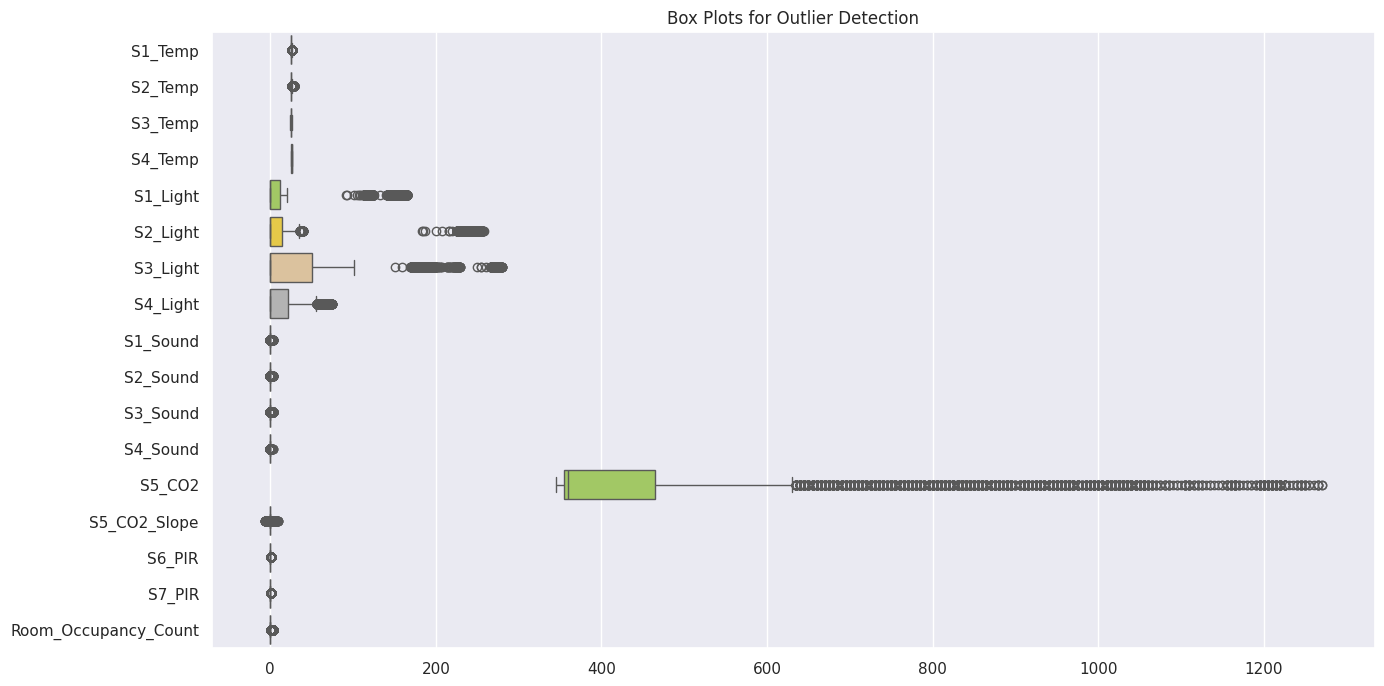

In [ ]:
# Assuming your DataFrame is named df
plt.figure(figsize=(15, 8))

# Box plots for each column
sns.boxplot(data=df, orient="h", palette="Set2")
plt.title('Box Plots for Outlier Detection')
plt.show()


In [ ]:
# columns = [Columns that has outliers]

# # Remove outliers using IQR
# for col in columns:
#     q1 = np.percentile(df[col], 25)
#     q3 = np.percentile(df[col], 75)
#     iqr = q3 - q1
#     lower_bound = q1 - 1.5 * iqr
#     upper_bound = q3 + 1.5 * iqr
#     df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

# # Remove outliers using Z-score
# for col in columns:
#     z_scores = (df[col] - df[col].mean()) / df[col].std()
#     df = df[np.abs(z_scores) < 2]

<ipython-input-14-1591a2bdeffc>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


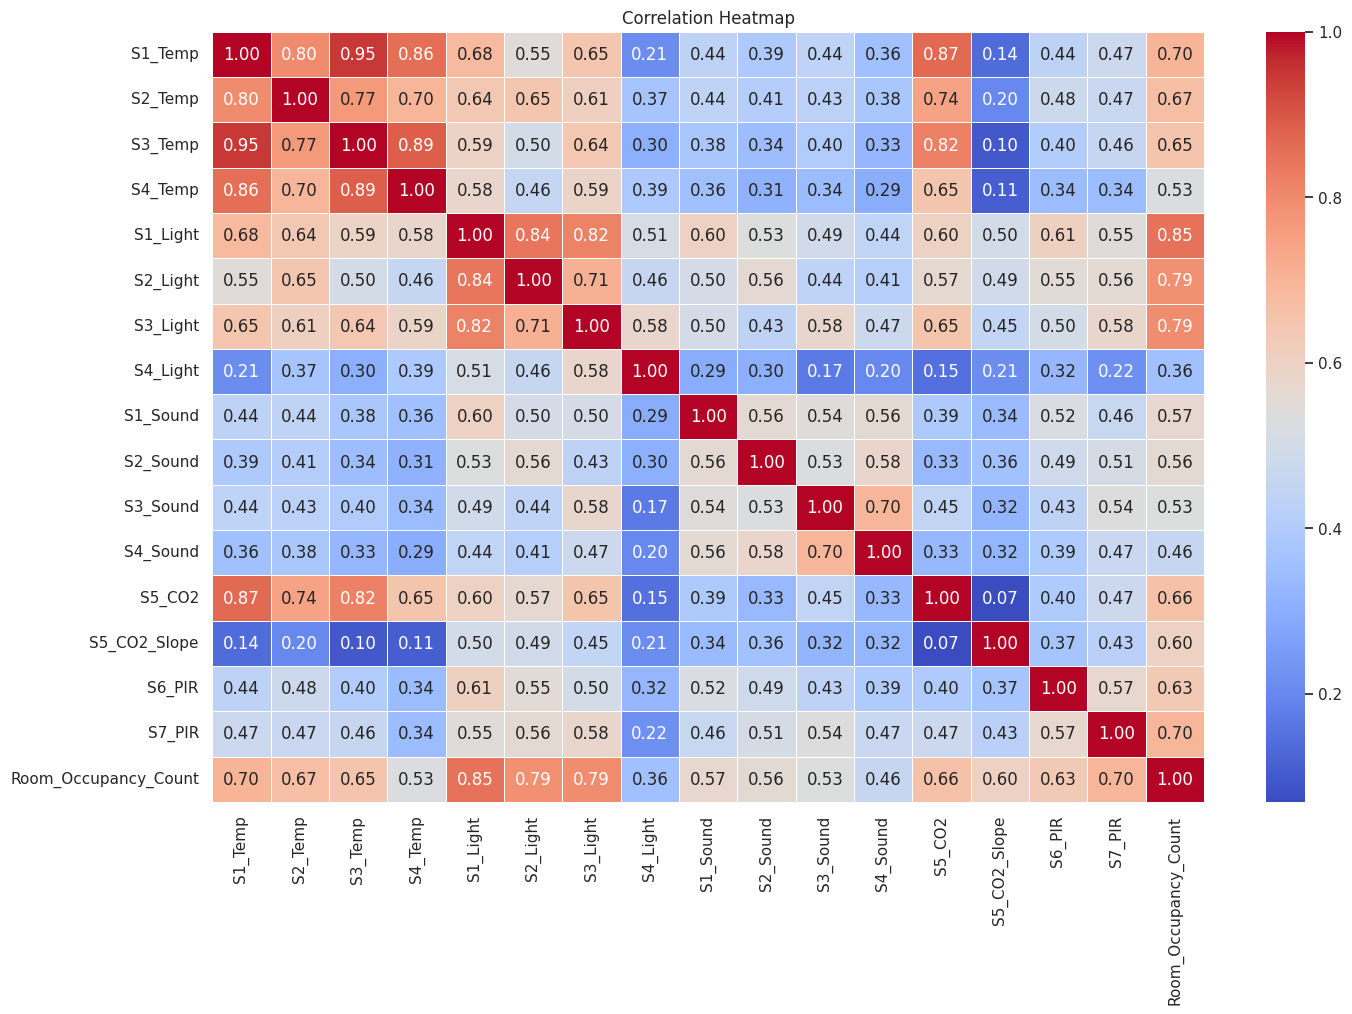

In [ ]:
correlation_matrix = df.corr()
plt.figure(figsize=(16, 10))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)

plt.title('Correlation Heatmap')
plt.show()

# **High Correlations:**

Positive Correlations:
"S1_Temp" has a high positive correlation with "S3_Temp" (0.95) and "S5_CO2" (0.87).
"S2_Temp" has a high positive correlation with "S1_Temp" (0.80).
"S5_CO2" has a high positive correlation with "S1_Temp" (0.87).
"S7_PIR" has a high positive correlation with "Room_Occupancy_Count" (0.70).

# **Insights:**
   - Temperature sensors ("S1_Temp," "S2_Temp," "S3_Temp," "S4_Temp") are strongly correlated with each other, which is expected.
   - Light sensors ("S1_Light," "S2_Light," "S3_Light," "S4_Light") are moderately correlated with each other.
   - CO2 levels ("S5_CO2") have a strong positive correlation with temperature and moderate positive correlations with light sensors.
   - "S7_PIR" (motion sensor) has a strong positive correlation with "Room_Occupancy_Count," indicating that it might be a good indicator of occupancy.

# **Preprocessing**

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y/%m/%d')
df['Date_Year'] = df['Date'].dt.year
df['Date_Month'] = df['Date'].dt.month
df['Date_Day'] = df['Date'].dt.day


df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S')
df['Time_In_Hour'] = df['Time'].dt.hour
df['Time_In_Minutes'] = df['Time'].dt.minute
df['Time_In_Seconds'] = df['Time'].dt.second

In [ ]:
# temperature_columns = ['S1_Temp', 'S2_Temp', 'S3_Temp', 'S4_Temp']
# df['Avg_Temperature'] = df[temperature_columns].mean(axis=1)

# light_columns = ['S1_Light', 'S2_Light', 'S3_Light', 'S4_Light']
# df['Avg_Light'] = df[light_columns].mean(axis=1)

# sound_columns = ['S1_Sound','S2_Sound','S3_Sound','S4_Sound']
# df['Avg_ Sounds'] = df[sound_columns].mean(axis=1)

In [ ]:
df = df.drop(['Time','Time_In_Minutes','Time_In_Seconds'], axis=1)
df = df.drop(['Date','Date_Year','Date_Month','Date_Day'], axis=1)

#  Random forest, SVM , Gradient boosting, and XGBoost testing train and test data.

In [ ]:
# Assuming df is your DataFrame and you have defined features and target variable
X = df.drop(['Room_Occupancy_Count'], axis=1)
y = df['Room_Occupancy_Count']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# **Before Balancing**

In [ ]:
from collections import defaultdict
# Initialize classifiers
rf_classifier = RandomForestClassifier(random_state=42)
svm_classifier = SVC(random_state=42)
gb_classifier = GradientBoostingClassifier(random_state=42)
xgb_classifier = XGBClassifier(random_state=42)

# Create a dictionary to store results
Results = defaultdict(dict)

# Train and evaluate each model
for model, name in zip(['Random Forest', 'SVM', 'Gradient Boosting', 'XGBoost'],
                             [rf_classifier, svm_classifier, gb_classifier, xgb_classifier]):
    # Train the model
    name.fit(X_train_scaled, y_train)

    # Predictions on the test set
    y_pred = name.predict(X_test_scaled)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Store results in the dictionary
    Results[model]['Accuracy'] = accuracy
    Results[model]['Precision'] = precision
    Results[model]['Recall'] = recall
    Results[model]['F1 Score'] = f1

# Display the results
model_names = list(Results.keys())
Accuracy_values = [Results[model]['Accuracy'] for model in model_names]
Precision_values = [Results[model]['Precision'] for model in model_names]
Recall_values = [Results[model]['Recall'] for model in model_names]
F1_score_values = [Results[model]['F1 Score'] for model in model_names]

# Print or use the values as needed
print("Model Names:", model_names)
print("Accuracy Values:", Accuracy_values)
print("Precision Values:", Precision_values)
print("Recall Values:", Recall_values)
print("F1 Score Values:", F1_score_values)


Model Names: ['Random Forest', 'SVM', 'Gradient Boosting', 'XGBoost']
Accuracy Values: [0.9990128331688055, 0.9925962487660415, 0.9955577492596249, 0.9970384995064165]
Precision Values: [0.9990175791631863, 0.9926692017938409, 0.9955483011559928, 0.9970321477346366]
Recall Values: [0.9990128331688055, 0.9925962487660415, 0.9955577492596249, 0.9970384995064165]
F1 Score Values: [0.9990131408411855, 0.9926271903242673, 0.9955161825110562, 0.9970247487418812]


## **After Balancing**

In [ ]:
SM = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = SM.fit_resample(X_train_scaled, y_train)

In [ ]:
# Initialize classifiers
rf_classifier = RandomForestClassifier(random_state=42)
svm_classifier = SVC(random_state=42)
gb_classifier = GradientBoostingClassifier(random_state=42)
xgb_classifier = XGBClassifier(random_state=42)


# Create a dictionary to store results
Results = defaultdict(dict)

# Define parameter grids for Grid Search
param_grid_rf = {'n_estimators': [50, 100, 200],
                 'max_depth': [None, 10, 20],
                 'min_samples_split': [2, 5, 10]}

param_grid_svm = {'C': [0.1, 1, 10],
                  'kernel': ['rbf', 'poly']}

param_grid_gb = {'n_estimators': [50, 100, 200],
                 'learning_rate': [0.01, 0.1, 0.2]}

param_grid_xgb = {'n_estimators': [50, 100, 200],
                  'learning_rate': [0.01, 0.1, 0.2]}

param_grids = [param_grid_rf, param_grid_svm, param_grid_gb, param_grid_xgb]
classifiers = [rf_classifier, svm_classifier, gb_classifier, xgb_classifier]

In [ ]:

import pandas as pd

# Dictionary to store results
Results = {}

# List to store all model results
all_results = []

# Train and evaluate each model with Grid Search
for model, name, param_grid in zip(['Random Forest', 'SVM', 'Gradient Boosting', 'XGBoost'],
                                         classifiers, param_grids):
    # Create KFold object
    kFold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    # Create GridSearchCV object with KFold
    grid_search = GridSearchCV(name, param_grid, cv=kFold, scoring=['accuracy', 'f1_weighted'], refit='accuracy', n_jobs=-1)


    # Fit the model with balanced training data
    grid_search.fit(X_train_scaled, y_train)

    # Best parameters
    best_params = grid_search.best_params_

    # Store best parameters in the dictionary
    Results[model] = {'Best Parameters': best_params}

    # Store accuracy for each parameter
    param_results = []
    for params, accuracy, f1_weighted in zip(grid_search.cv_results_['params'],
                                             grid_search.cv_results_['mean_test_accuracy'],
                                             grid_search.cv_results_['mean_test_f1_weighted']):
        param_result = {'Model': model, 'Parameters': params, 'Accuracy': accuracy, 'F1 Weighted': f1_weighted}
        param_results.append(param_result)
        all_results.append(param_result)

    Results[model]['Parameter Results'] = param_results

# Display the results
for model in model_names:
    print(f"Model: {model}")
    print(f"Best Parameters: {Results[model]['Best Parameters']}")
    print("Parameter Results:")
    for param_result in Results[model]['Parameter Results']:
        print(f"Model: {param_result['Model']}, Parameters: {param_result['Parameters']}, Accuracy: {param_result['Accuracy']}")
    print()


Model: Random Forest
Best Parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}
Parameter Results:
Model: Random Forest, Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}, Accuracy: 0.9970380271285062
Model: Random Forest, Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}, Accuracy: 0.9972850168696354
Model: Random Forest, Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}, Accuracy: 0.9975317781281179
Model: Random Forest, Parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 50}, Accuracy: 0.9969147988210295
Model: Random Forest, Parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}, Accuracy: 0.9969147988210295
Model: Random Forest, Parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}, Accuracy: 0.9970382556111529
Model: Random Forest, Parameters: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 50}, Accuracy

In [ ]:
Results = {}

evaluation_results = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

# Train and evaluate each model with Grid Search
for model, name, param_grid in zip(['Random Forest', 'SVM', 'Gradient Boosting', 'XGBoost'],
                                         classifiers, param_grids):
    # Create KFold object
    kFold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    # Create GridSearchCV object with KFold
    grid_search = GridSearchCV(name, param_grid, cv=kFold, scoring=['accuracy', 'f1_weighted'], refit='accuracy', n_jobs=-1)

    # Fit the model with balanced training data
    grid_search.fit(X_train_scaled, y_train)

    # Best parameters
    best_params = grid_search.best_params_

    # Store best parameters in the dictionary
    Results[model] = {'Best Parameters': best_params}

    # Store accuracy for each parameter
    param_results = []
    for params, accuracy, f1_weighted in zip(grid_search.cv_results_['params'],
                                             grid_search.cv_results_['mean_test_accuracy'],
                                             grid_search.cv_results_['mean_test_f1_weighted']):
        param_result = {'Model': model, 'Parameters': params, 'Accuracy': accuracy, 'F1 Weighted': f1_weighted}
        param_results.append(param_result)


    Results[model]['Parameter Results'] = param_results

    # Set the model with the best parameters
    best_classifier = grid_search.param_results_
    best_classifier.fit(X_train_scaled, y_train)

    # Make predictions on the test set
    y_pred = best_classifier.predict(X_test_scaled)

    # Evaluation
    report = classification_report(y_test, y_pred, output_dict=True)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Store results in a DataFrame
    results = {
        'Model': model,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
    }
    df = pd.DataFrame(results, index=[0])
    # Concatenate the results to the main DataFrame
    evaluation_results = pd.concat([evaluation_results, df], ignore_index=True)

# Display the evaluation results
print("After Grid_earch:")
print(evaluation_results)


AttributeError: 'GridSearchCV' object has no attribute 'param_results_'